## 입력변수가 1개인 선형회귀(Linear Regression) 예제

(참고용)

### 1. 학습

In [3]:
import numpy as np

x_data = np.array([1, 2, 3, 4, 5]).reshape(5, 1)
t_data = np.array([2, 3, 4, 5, 6]).reshape(5, 1)

In [4]:
x_data

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [5]:
t_data

array([[2],
       [3],
       [4],
       [5],
       [6]])

In [19]:
W = np.random.rand(1, 1)
b = np.random.rand(1)

# W는 독립변수가 1개일 수 있고 이상일 수 있기때문에 2차원 배열로 만들어줌

In [20]:
W

array([[0.19939956]])

In [21]:
b

array([0.84018272])

#### 손실함수

평균제곱오차(MSE)를 구하는 함수

In [22]:

def loss_func(x, t):
    y = np.dot(x, W) + b
    return (np.sum((t-y)**2)) / (len(x))

# dot() 행렬연산자
# 기계학습에서 행렬연산이 기본
# t = 실제값, y = 계산값

---

// multi_index 예제

In [18]:
import numpy as np

A = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])

print(A, "\n")
print("A.shape ==", A.shape, "\n")

it = np.nditer(A, flags=['multi_index'], op_flags=['readwrite'])

while not it.finished:
    idx = it.multi_index
    print(idx, "current value =>", A[idx])
    it.iternext()

[[1 2 3 4]
 [5 6 7 8]] 

A.shape == (2, 4) 

(0, 0) current value => 1
(0, 1) current value => 2
(0, 2) current value => 3
(0, 3) current value => 4
(1, 0) current value => 5
(1, 1) current value => 6
(1, 2) current value => 7
(1, 3) current value => 8


// A데이터 구조
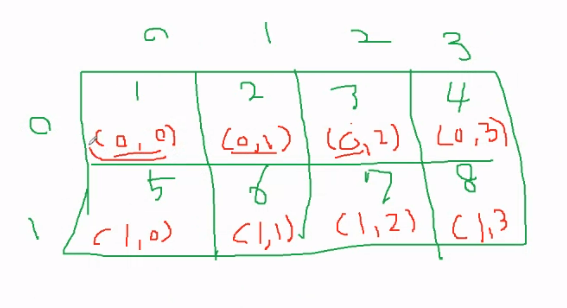

---
#### 수치미분 함수

In [23]:
def numerical_derivative(f, x):
    delta_x = 1e-4     # 0.0001
    grad = np.zeros_like(x)
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    # x => 1행 1열 구조, 이 위치에 값을 넣어주는게 nditer()
    
    while not it.finished:
        idx = it.multi_index    # W의 인덱스 값인 (0, 0)이 idx에 저장
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x   # x 배열에 수정된 가중치 저장
        fx1 = f(x)   # f(x+delta_x): f함수에 대한 비용 계산 후 fx1에 저장
        
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x)   # f(x-delata_x)
        grad[idx] = (fx1 - fx2) / (2 * delta_x)
        # p17의 공식으로 구한 fx1, fx2를 이용하여 미분 전체 계산 값이 grad에 저장
        
        x[idx] = tmp_val
        it.iternext()    # 다음 인덱스로 이동
        
    return grad

In [24]:
learning_rate = 1e-2     # 학습률 a
f = lambda x : loss_func(x_data, t_data)
print("Initial loss value =", loss_func(x_data, t_data), "/ Inital W =", W, "/ b =", b, "\n")

for step in range(6001):
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 300 == 0):
        print("step =", step, "/ loss value =", loss_func(x_data, t_data), "/ W =", W, "/ b =", b)

Initial loss value = 7.843812013152797 / Inital W = [[0.19939956]] / b = [0.84018272] 

step = 0 / loss value = 4.614887297874217 / W = [[0.38512069]] / b = [0.88027182]
step = 300 / loss value = 3.555927375357171e-06 / W = [[0.99877546]] / b = [1.0044199]
step = 600 / loss value = 4.5143847777245964e-07 / W = [[0.99956369]] / b = [1.00157484]
step = 900 / loss value = 5.731182830848221e-08 / W = [[0.99984454]] / b = [1.00056112]
step = 1200 / loss value = 7.275954145999072e-09 / W = [[0.99994461]] / b = [1.00019993]
step = 1500 / loss value = 9.237099966427937e-10 / W = [[0.99998026]] / b = [1.00007124]
step = 1800 / loss value = 1.1726849026324676e-10 / W = [[0.99999297]] / b = [1.00002538]
step = 2100 / loss value = 1.4887679962671974e-11 / W = [[0.99999749]] / b = [1.00000904]
step = 2400 / loss value = 1.8900474805600433e-12 / W = [[0.99999911]] / b = [1.00000322]
step = 2700 / loss value = 2.3994870207141955e-13 / W = [[0.99999968]] / b = [1.00000115]
step = 3000 / loss value = 3

### 2. 예측

In [25]:
def predict(x):
    y = np.dot(x, W) + b
    return y

predict(np.array([43]))   # 예측테스트

array([44.])

---

## 입력변수가 2개 이상인 선형회귀 예제
### 1. 학습

In [43]:
import numpy as np

loaded_data = np.loadtxt('./data_01.csv', delimiter=',', dtype=np.float32)
x_data = loaded_data[:, 0:-1]
t_data = loaded_data[:, [-1]]   # 2차원구조로 만들기 위해 []를 한 번 더 사용

# 데이터 차원 및 shape 확인
print("x_data.ndim =", x_data.ndim, "/ x_data.shape =", x_data.shape)
print("t_data.ndim =", t_data.ndim, "/ t_data.shape =", t_data.shape)

np.random.seed(42)
W = np.random.rand(3, 1)
b = np.random.rand(1)
print("W =", W, "\nW.shape =", W.shape, "/ b =", b, "/ b.shape = ", b.shape, "\n")

# 가중치 W, 바이어스 b 업데이트 및 학습 결과
learning_rate = 1e-5
f = lambda x : loss_func(x_data, t_data)
print("Initial loss value =", loss_func(x_data, t_data), "\n")

for step in range(30001):   # 가중치가 많아졌기때문에 학습데이터가 더 필요
    W -= learning_rate * numerical_derivative(f, W)
    b -= learning_rate * numerical_derivative(f, b)
    
    if (step % 3000 == 0):
        print("step =", step, "/ loss value =", loss_func(x_data, t_data), "\n/ W =", W, "\n/ b =", b)

x_data.ndim = 2 / x_data.shape = (9, 3)
t_data.ndim = 2 / t_data.shape = (9, 1)
W = [[0.37454012]
 [0.95071431]
 [0.73199394]] 
W.shape = (3, 1) / b = [0.59865848] / b.shape =  (1,) 

Initial loss value = 18.912018958218844 

step = 0 / loss value = 11.964774630423882 
/ W = [[0.36933621]
 [0.94535252]
 [0.72658915]] 
/ b = [0.59861768]
step = 3000 / loss value = 4.418931926580983 
/ W = [[0.44618706]
 [0.70489027]
 [0.85626088]] 
/ b = [0.60182856]
step = 6000 / loss value = 3.8705650947081622 
/ W = [[0.45157271]
 [0.61205328]
 [0.94010838]] 
/ b = [0.60300253]
step = 9000 / loss value = 3.718669962755764 
/ W = [[0.44022928]
 [0.57056994]
 [0.99082755]] 
/ b = [0.60275869]
step = 12000 / loss value = 3.667505157681574 
/ W = [[0.42877536]
 [0.55002954]
 [1.02157574]] 
/ b = [0.60161283]
step = 15000 / loss value = 3.6490087100776845 
/ W = [[0.42038886]
 [0.5390061 ]
 [1.04024772]] 
/ b = [0.59990775]
step = 18000 / loss value = 3.642106732530343 
/ W = [[0.41484196]
 [0.53276077]
 

In [36]:
loaded_data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.]], dtype=float32)

In [37]:
x_data

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.]], dtype=float32)

In [38]:
t_data

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.]], dtype=float32)

### 2. 예측

In [42]:
test_data = np.array([100, 98, 81])
predict(test_data)

array([179.13680055])

---

## 실습 예제

### 1. scikit-learn으로 실습

- 참고: https://scikit-learn.org/stable/

// 연습용 데이터 불러오기

In [44]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [52]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

((379, 13), (127, 13), (379,), (127,))

In [49]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [50]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [51]:
data.data[0]

# 숫자로 이루어진 데이터이므로 인코딩작업은 필요하지 않음

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

// 모델 생성 및 학습

In [47]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

// 모델 예측 및 평가

In [48]:
score = model.score(X_test, y_test)
print("정확도:", score)
# 실제 구할때 정확도가 65% 이상이면 잘 나온편

cofficient = model.coef_
print("계수:", cofficient)

intercept = model.intercept_
print("절편:", intercept)

정확도: 0.6844267283527141
계수: [-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]
절편: 29.83642016383914


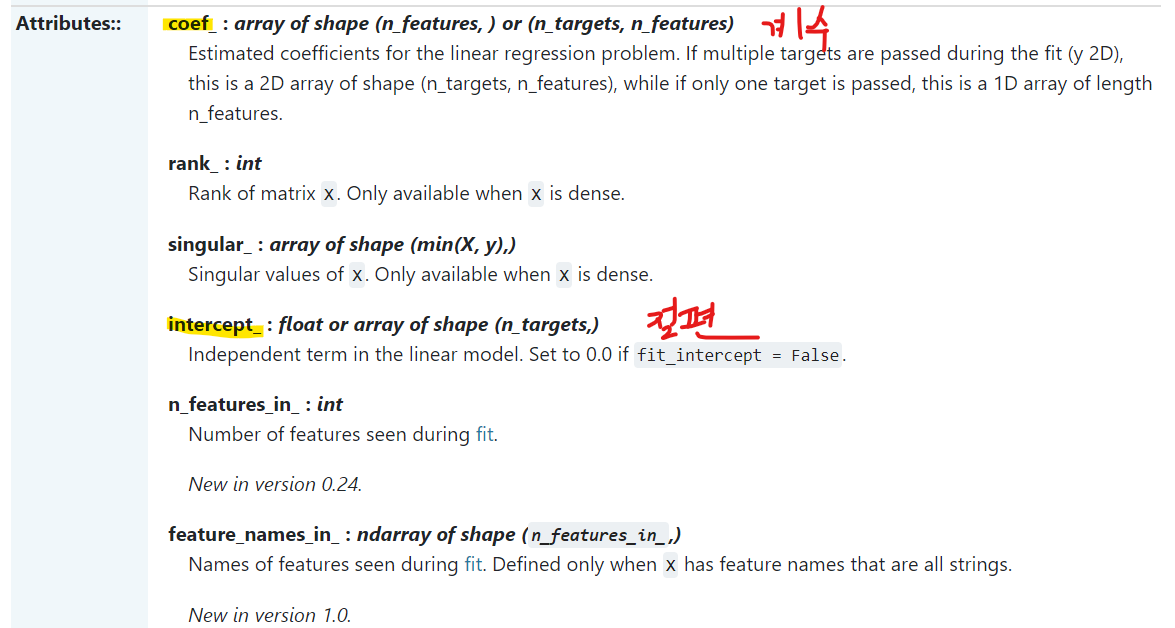

### 2. 추가 예제1 - 단순 회귀 분석

In [2]:
from scipy import stats

x = [32, 64, 96, 118, 126, 144, 152, 158]
y = [18, 24, 61.5, 49, 52, 105, 130, 125]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope: {}\nintercept: {}\nr_value: {}\nnp_value: {}\nstd_err: {}".format(slope, intercept, r_value, p_value, std_err))

# x가 하나이면 독립변수가 하나인 구조로 보면 된다.
# linregress(학습데이터, 정답데이터) => 선형회귀모델
# slope => w 기울기
# intercept => b 절편
# r_value => 결정계수
# p_value => 불확실성정도
# std_err => 표준편차

# 종속변수와 독립변수 간에는 인과관계가 높아야하는데,
# 독립변수와 독립변수 사이에는 상관관계가 높아서는 안된다.

slope: 0.8744839346616406
intercept: -26.723837731107523
r_value: 0.8880668255497455
np_value: 0.00321829451984264
std_err: 0.18480710092393707


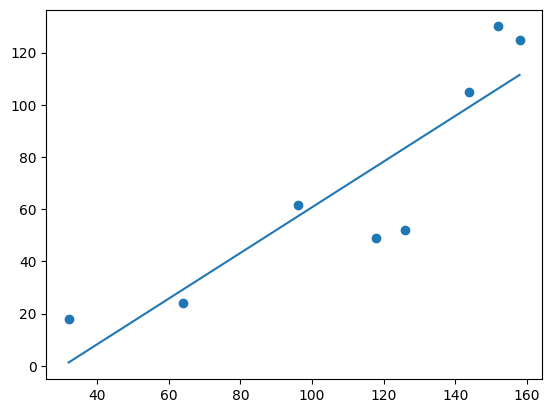

In [3]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x, slope*np.array(x) + intercept, '-')
plt.show()

# plot()을 사용할때 별도의 설정을하지 않으면 lineplot으로 생성된다.
# plot의 y축은 예측값을 가지고 생성

### 3. 추가 예제2 - 다중 회귀 분석

In [22]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

print("KEY:", boston.keys())
print("DATA SHAPE:", boston.data.shape)
print("FEATURE NAMES:", boston.feature_names)
print("DESCR:", boston.DESCR)

KEY: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
DATA SHAPE: (506, 13)
FEATURE NAMES: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
DESCR: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
print(X_test_scaled)

# MinMaxScaler: 최대/최소값이 각각 1, 0이 되도록 스케일링

[[0.01823449 0.         0.78555718 ... 0.91489362 1.         0.9270922 ]
 [0.00121704 0.2        0.23826979 ... 0.63829787 0.99510817 0.17021277]
 [0.00619828 0.         0.78555718 ... 0.91489362 0.99437692 0.43205674]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.24312057]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.48425532]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.36765957]]
[[6.84726112e-04 0.00000000e+00 1.01906158e-01 ... 4.57446809e-01
  9.45307378e-01 1.59148936e-01]
 [1.03697791e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.22462051e-01 2.21276596e-01]
 [1.21310718e-03 0.00000000e+00 4.92302053e-01 ... 4.04255319e-01
  9.92031873e-01 2.48794326e-01]
 ...
 [1.88889543e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  1.00000000e+00 8.24964539e-01]
 [5.46994106e-03 0.00000000e+00 3.46041056e-01 ... 6.17021277e-01
  1.00000000e+00 7.97163121e-02]
 [2.64471527e-04 0.00000000e+00 6.30498534e-02 ... 6.489

In [24]:
from sklearn.linear_model import LinearRegression

model_boston = LinearRegression().fit(X_train_scaled, y_train)
print(model_boston.coef_)
print(model_boston.intercept_)

# scikit-learn 패키지를 사용하여 선형 회귀분석을 하는 경우에는 linear_model 서브 패키지의 LinearRegression 클래스를 사용한다.
# 회귀분석을 하고나면 모형 객체는 다음과 같은 속성을 가지게되며 fit메서드는 객체 자신을 반환

[-10.79297182   4.44664254   0.30940143   2.51124642  -7.88838891
  20.14047594  -0.96955959 -16.43140234   5.56929972  -5.8015249
  -9.5668748    2.70248071 -17.15751681]
28.15228603154896


In [25]:
model_boston.score(X_train_scaled, y_train)

# score(): 정확도계산 / 회귀모델에서는 결정 계수 R^2 점수를 계산. 결정 계수는 -1~1 사이 값을 가짐

0.7645451026942549

In [26]:
from sklearn.model_selection import cross_val_score

r2 = cross_val_score(model_boston, X_train_scaled, y_train, cv=5)
r2

array([0.7246982 , 0.58082515, 0.77515092, 0.72161474, 0.78935797])



#### cross_val_score(model, X, y, scoring=None, cv=None): 교차검증 함수
- model: 회귀 분석 모형
- X: 독립변수 데이터
- y: 종속변수 데이터
- scoring: 성능 검증에 사용할 함수 이름
- cv: 교차검증 생성기 객체 또는 숫자. None이면 KFold(3), 숫자 k이면 KFold(k)

In [27]:
r2.mean()

# 평균 출력

0.7183293974315899

In [28]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train, model_boston.predict(X_train_scaled)))

# 정답데이터와 예측결과를 넣어주면 평균제곱오차를 구해주는 함수

4.4674623461466405

#### mean_squared_error(): 평균 제곱근 오차 구함(RMSE: Root Mean Square Error)

- 추정 값 또는 모델이 예측한 값과 실제 환경에서 관찰되는 값의 차이를 다룰때 흔히 사용하는 척도
- 선형회귀란 임의의 직선을 그어 이에 대한 RMSE를 구하고, 이 값을 가장 작게 만들어주는 w, b 값을 찾아가는 작업

In [29]:
y_pred = model_boston.predict(X_test_scaled)
y_pred

array([24.9357079 , 23.75163164, 29.32638296, 11.97534566, 21.37272478,
       19.19148525, 20.5717479 , 21.21154015, 19.04572003, 20.35463238,
        5.44119126, 16.93688709, 17.15482272,  5.3928209 , 40.20270696,
       32.31327348, 22.46213268, 36.50124666, 31.03737014, 23.17124551,
       24.74815321, 24.49939403, 20.6595791 , 30.4547583 , 22.32487164,
       10.18932894, 17.44286422, 18.26103077, 35.63299326, 20.81960303,
       18.27218007, 17.72047628, 19.33772473, 23.62254823, 28.97766856,
       19.45036239, 11.13170639, 24.81843595, 18.05294835, 15.59712226,
       26.21043403, 20.81140432, 22.17349382, 15.48367365, 22.62261604,
       24.88561528, 19.74754478, 23.0465628 ,  9.84579105, 24.36378793,
       21.47849008, 17.62118176, 24.39160873, 29.95102691, 13.57219422,
       21.53645439, 20.53306273, 15.03433182, 14.3232289 , 22.11929299,
       17.07321915, 21.54141094, 32.96766968, 31.371599  , 17.7860591 ,
       32.75069556, 18.74795323, 19.21428022, 19.41970047, 23.08

In [30]:
import math
from sklearn.metrics import mean_squared_error

rmse_test = math.sqrt(mean_squared_error(y_test, y_pred))
rmse_test

# RMSE(Root MSE): 루트 평균 제곱 오류

5.214975145375404

In [31]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

# 결정 계수 구함.
# 결정계수(r2, R-squared): 상관계수를 제곱한 값

0.6733825506400194

In [32]:
model_boston.score(X_test_scaled, y_test)

0.6733825506400194

## 보스턴 집값 데이터를 이용한 다중 회귀식 추정

In [33]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data
boston_df.head()

# 앞 13개 데이터가 학습데이터, medv 타깃데이터?

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [35]:
import statsmodels.formula.api as smf

formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
formula

# 타깃데이터 ~ 독립변수+독립변수+...+독립변수


'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

#### OLS(Ordinary Least Squares): 가장 기본적인 결정론적 선형 회귀 방법
잔차제곱합(RSS, Residual Sum of Squares)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법 

In [36]:
model_boston = smf.ols(formula=formula, data=boston_df).fit()
model_boston.summary()

# formula=formula => 원본에서 medv feature를 제외한 상태
# R-square: 결정 계수 => 선형회귀에서는 정확도
# coef: 계수(= 기울기)
# std err: 표준 오차
# t: 계수 / 표준 오차
# P: 유의수준 (0.05보다 높으몬 쓸모없는 변수)

# Intercept 컬럼이 자동 생성됨

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          6.72e-135
Time:                        10:10:41   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
import statsmodels.formula.api as smf

formula = "medv ~ rad + zn + rm + chas + age -1"
model_boston2 = smf.ols(formula=formula, data=boston_df).fit()
model_boston2.summary()

# -1은 Intercept행을 의미

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              1363.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   5.05e-289
Time:                        10:11:43   Log-Likelihood:                         -1654.6
No. Observations:                 506   AIC:                                      3319.
Df Residuals:                     501   BIC:                                      3340.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
rad           -0.2183      0.037     -5.924      0.000      -0.291      -0.146
zn             0.0161      0.015      1.056      0.291      -0.014       0.046
rm             4.7232      0.147     32.166      0.000       4.435       5.012
chas           5.6944      1.128      5.047      0.000       3.478       7.911
age           -0.0792      0.012     -6.358      0.000      -0.104      -0.055
==============================================================================
Omnibus:                      234.375   Durbin-Watson:                   0.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.471
Skew:                           2.008   Prob(JB):                    6.49e-273
Kurtosis:                       9.583   Cond. No.                         299.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 보스턴 집값 데이터의 VIF 확인

In [41]:
import statsmodels.api as sm

Boston = sm.datasets.get_rdataset("Boston", package="MASS")
boston_df = Boston.data

formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns)
formula

'medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat'

In [44]:
from patsy import dmatrices

y, X = dmatrices(formula, boston_df, return_type="dataframe")
y

# dmatrices() => boston_df에서 종속변수와 독립변수를 분리하는 작업 수행

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [45]:
X

,Intercept,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [46]:
import pandas as pd

vif = pd.DataFrame()

In [47]:
X.shape[1]

# 컬럼의 개수

14

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

# variance_inflation_factor(): VIF 계산 함수

,VIF Factor,features
0,585.265238,Intercept
1,1.792192,crim
2,2.298758,zn
3,3.991596,indus
4,1.073995,chas
5,4.393720,nox
6,1.933744,rm
7,3.100826,age
8,3.955945,dis
9,7.484496,rad


In [51]:
def get_vif(formula, df):
    from patsy import dmatrices
    y, X = dmatrices(formula, df, return_type="dataframe")
    vif = pd.DataFrame()
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['features'] = X.columns
    
    return vif

formula = "medv~" + "+".join(boston_df.iloc[:, :-1].columns) + "-1"
print(formula)
get_vif(formula, boston_df)

medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+black+lstat-1


,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


// 다중공선성이 있는 데이터를 하나씩 제거해주며 10이 넘지 않게 조정

In [52]:
formula = "medv~crim+zn+indus+chas+nox+rm+age+dis+rad+tax+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.099345,crim
1,2.451624,zn
2,14.275283,indus
3,1.142167,chas
4,73.894171,nox
5,60.598846,rm
6,21.361234,age
7,12.221605,dis
8,15.159162,rad
9,59.301541,tax


In [53]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+tax+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.097537,crim
1,2.449661,zn
2,13.150904,indus
3,1.138277,chas
4,41.406746,rm
5,19.889623,age
6,12.032952,dis
7,15.155012,rad
8,57.720347,tax
9,18.396072,black


In [54]:
formula = "medv~crim+zn+indus+chas+rm+age+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.097466,crim
1,2.375219,zn
2,9.290080,indus
3,1.118613,chas
4,39.069063,rm
5,19.780944,age
6,11.817803,dis
7,4.965633,rad
8,18.289917,black
9,9.046248,lstat


In [55]:
formula = "medv~crim+zn+indus+chas+age+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.095367,crim
1,2.334763,zn
2,9.016142,indus
3,1.116229,chas
4,14.000758,age
5,8.447694,dis
6,4.771767,rad
7,13.537020,black
8,8.358925,lstat


In [56]:
formula = "medv~crim+zn+indus+chas+dis+rad+black+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.095211,crim
1,2.313889,zn
2,8.205465,indus
3,1.106350,chas
4,8.209371,dis
5,4.689836,rad
6,10.074224,black
7,6.856889,lstat


In [57]:
formula = "medv~crim+zn+indus+chas+dis+rad+lstat-1"
get_vif(formula, boston_df)

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


In [58]:
model_boston3 = smf.ols(formula=formula, data=boston_df).fit()
model_boston3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.822
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              330.1
Date:                Fri, 07 Oct 2022   Prob (F-statistic):                   1.03e-182
Time:                        11:04:52   Log-Likelihood:                         -1895.9
No. Observations:                 506   AIC:                                      3806.
Df Residuals:                     499   BIC:                                      3835.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.1840      0.071     -2.599      0.010      -0.323      -0.045
zn             0.0529      0.027      1.970      0.049       0.000       0.106
indus          0.8391      0.092      9.098      0.000       0.658       1.020
chas           9.1546      1.820      5.031      0.000       5.580      12.730
dis            3.6821      0.211     17.469      0.000       3.268       4.096
rad            0.1755      0.077      2.283      0.023       0.024       0.327
lstat         -0.3776      0.082     -4.606      0.000      -0.539      -0.217
==============================================================================
Omnibus:                       94.793   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.764
Skew:                           1.110   Prob(JB):                     2.75e-36
Kurtosis:                       4.686   Cond. No.                         107.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 정규화 선형회귀 예시

### 1. scikit learn 으로 실습

// 당뇨병 데이터 로드

---
#### load_diabetes

- age: 연령
- sex: 성별
- BMI: 체질량 지수
- bp: 평균 혈압
- s1: tc, 총 혈청 콜레스테롤
- s2: ldl, 저밀도 지단백질
- s3: hdl, 고밀도 지단백질
- s4: tch, 총 콜레스테롤 / HDL
- s5: ltg, 아마도 혈청 트리글리세리드 수준의 로그
- s6: glu, 혈당 수치

---

In [63]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)
print(X_train.shape, X_test.shape)

print("KEY:", data.keys())
print("TARGET:", data.target[:10])
print("FEATURE NAMES:", data.feature_names)
print("DESCR:", data.DESCR)

(331, 10) (111, 10)
KEY: dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])
TARGET: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]
FEATURE NAMES: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
DESCR: .. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc,

#### Ridge Regression 모델

In [60]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)   # 하이퍼 파라미터 => 람다값(⋋)
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.4384009113704955

In [65]:
ridge.coef_

array([  50.55155508,  -67.72236516,  278.3007281 ,  197.62401363,
         -6.2459735 ,  -26.22698465, -151.39451804,  120.32319558,
        215.85469359,  101.75554294])

#### Lasso Regression 모델

In [61]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)   # 하이퍼 파라미터
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.37914194389255096

In [66]:
lasso.coef_

array([  0.        ,  -0.        , 398.38436775,  46.17884277,
         0.        ,   0.        ,  -0.        ,   0.        ,
       238.18740159,   0.        ])

#### Elastic-net Regression 모델

In [69]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=1.0, l1_ratio=0.5)   # 하이퍼 파라미터 / l1은 lasso의 비율을 나타냄 (ridge의 비율은 1-lasso비율)
elastic.fit(X_train, y_train)
elastic.score(X_test, y_test)

-0.0044383730131891674

In [67]:
elastic.coef_

array([ 0.41308763,  0.        ,  3.29899112,  2.25693877,  0.33937965,
        0.08078391, -1.87466133,  2.1438686 ,  2.94796429,  1.70198081])

// 정규화 선형회귀 모델별 가중치(계수) 비교

In [70]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

// 선형 모델을 비교하기 위해 생성

In [75]:
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.48490866359058005

// 계수를 한 문에 비교하기 위한 DataFrame

In [81]:
coefs = np.vstack((linear.coef_, ridge.coef_, lasso.coef_, elastic.coef_))
index = ['linear', 'ridge', 'lasso', 'elastic']
coefs_df = pd.DataFrame(coefs, columns=data.feature_names, index=index)
print("정규화 선형회귀 모델별 가중치(계수) 비교:")
coefs_df

정규화 선형회귀 모델별 가중치(계수) 비교:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
linear,47.746571,-241.991804,531.968569,381.565299,-918.490206,508.251474,116.940405,269.485086,695.806221,26.323431
ridge,50.551555,-67.722365,278.300728,197.624014,-6.245973,-26.226985,-151.394518,120.323196,215.854694,101.755543
lasso,0.000000,-0.000000,398.384368,46.178843,0.000000,0.000000,-0.000000,0.000000,238.187402,0.000000
elastic,0.413088,0.000000,3.298991,2.256939,0.339380,0.080784,-1.874661,2.143869,2.947964,1.701981


## LinearRegression을 이용한 보스턴 주택 가격 예측

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

// 데이터셋 로드

In [98]:
boston = load_boston()

C:\project\AI_Source\AI_01\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

// 데이터셋 DataFrame 변환

In [99]:
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


// boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가

In [100]:
bostonDF['PRICE'] = boston.target
print("Boston dataset 크기:", bostonDF.shape)
bostonDF.head()

Boston dataset 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


// 회귀 직선과 산점도 그래프를 그려서 파악

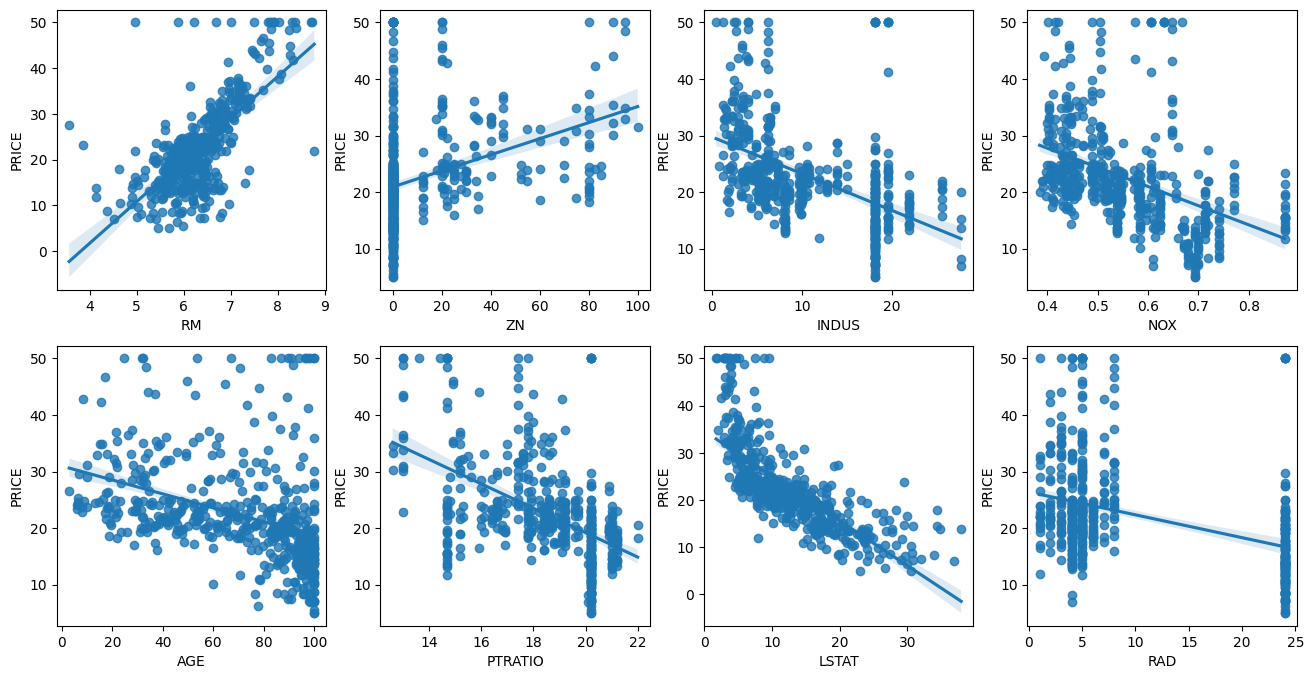

In [101]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
Im_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(Im_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [102]:
bostonDF.corr()

# 실제 상관관계 수치 확인

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
y_target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [104]:
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)
X_train.shape, X_test.shape

((354, 13), (152, 13))

In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE: {0:.3f}, RMSE: {1:.3f}".format(mse, rmse))
print("Variance score: {0:.3f}".format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [111]:
print("절편 값:", lr.intercept_)
print("회귀계수 값:", np.round(lr.coef_, 1))

절편 값: 40.99559517216429
회귀계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


// Ridge 데이터를 시각화

In [126]:
alphas = [0, 0.1, 1, 10, 100]

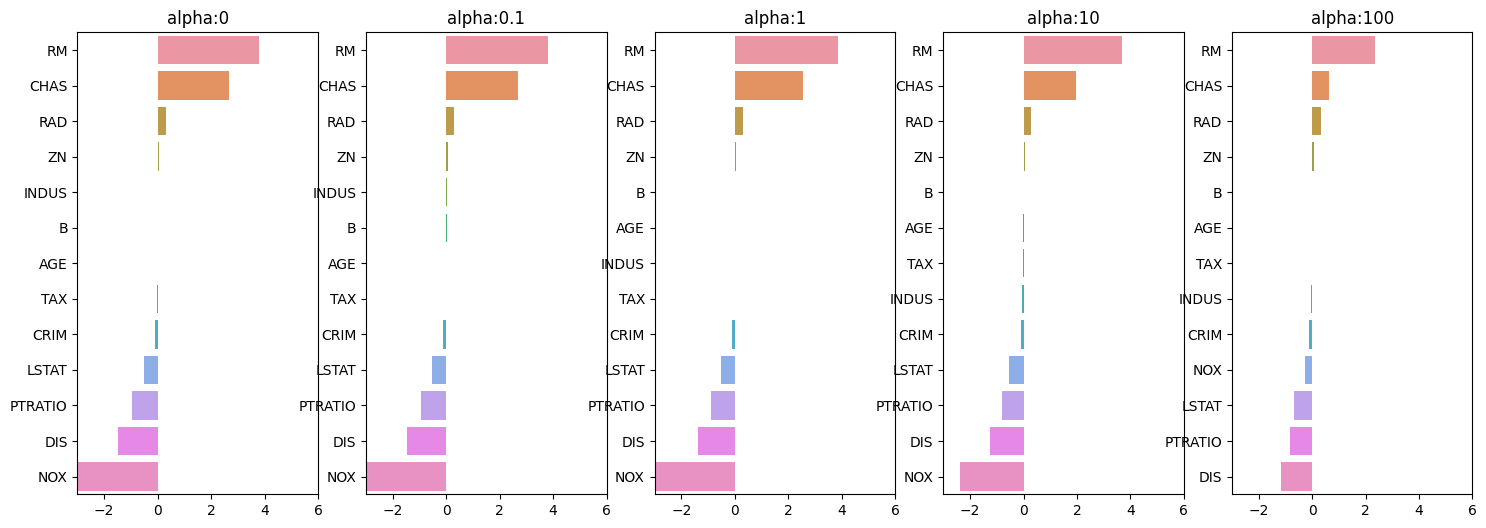

In [130]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [133]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


// Lasso Regression, Ridge Regression, ElasticNet Regression 비교

In [112]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score

// alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환

In [137]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose: print("#######", model_name, "#######")
        
    for param in params:
        if model_name == 'Ridge': model = Ridge(alpha=param)
        elif model_name == 'Lasso': model = Lasso(alpha=param)
        elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print("alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f}".format(param, avg_rmse))
        
        model.fit(X_data, y_target)
        
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        
        coeff_df[colname] = coeff
        
    return coeff_df

### Lasso Regression

In [139]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [141]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


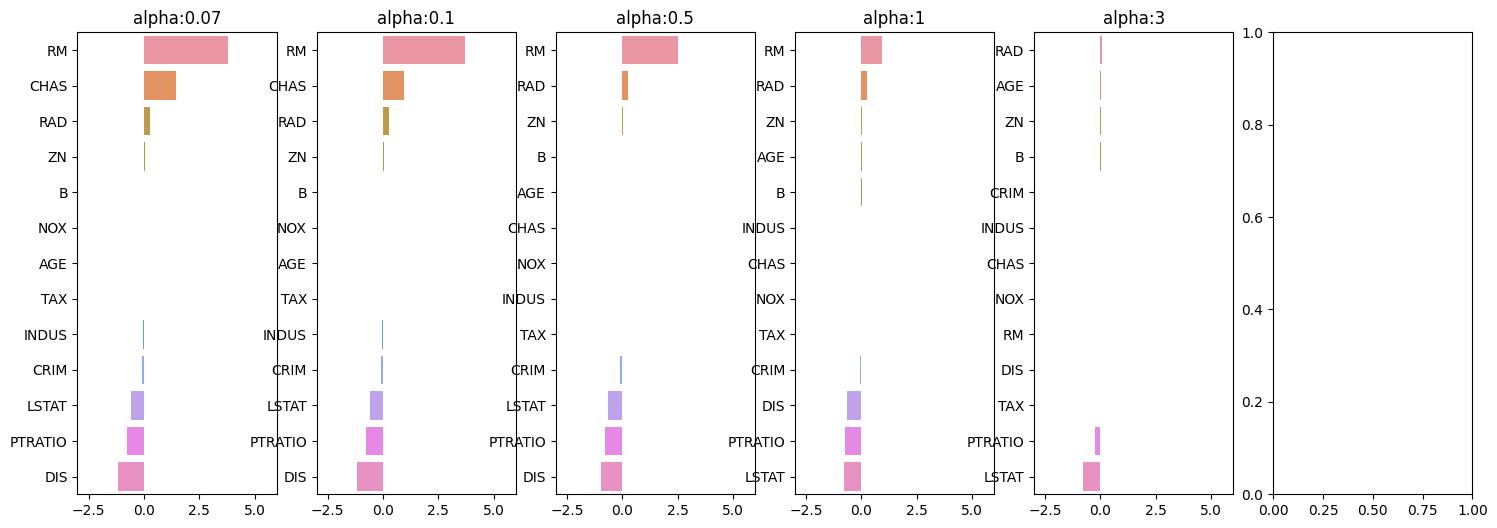

In [142]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)

for pos, alpha in enumerate(lasso_alphas):
    colname = 'alpha:' + str(alpha)
    coeff = coeff_lasso_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

### Ridge Regression

In [140]:
ridge_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)

####### Ridge #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589


In [144]:
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.815869,3.818233,3.840757,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.533343,-0.542009


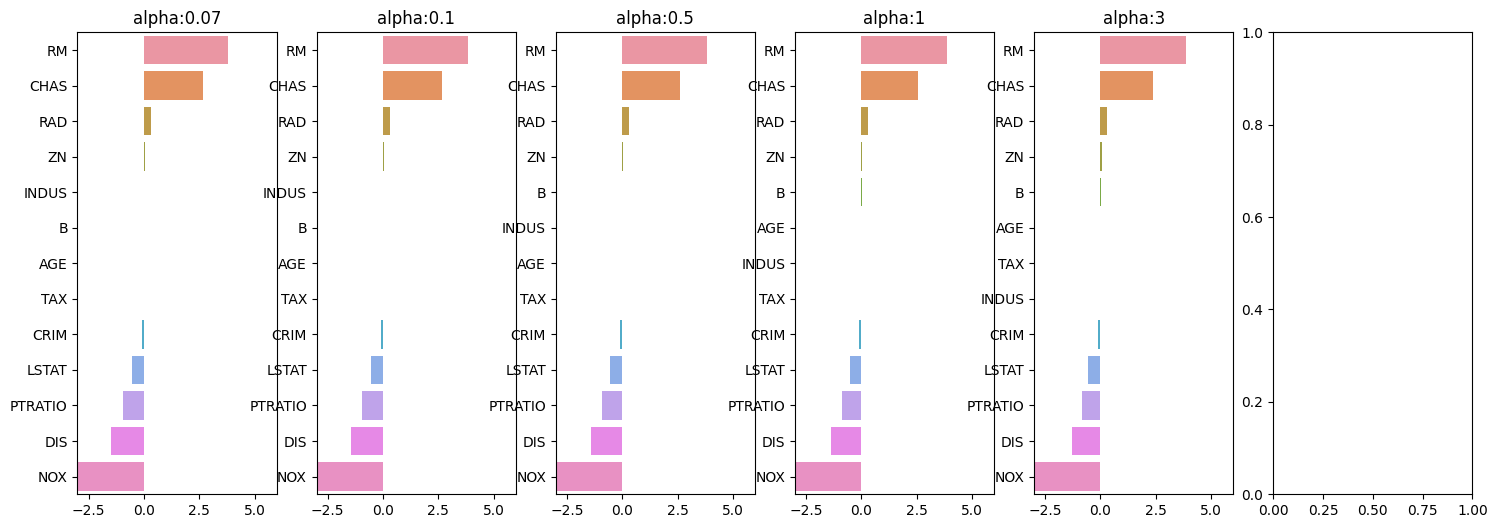

In [149]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)

for pos, alpha in enumerate(ridge_alphas):
    colname = 'alpha:' + str(alpha)
    coeff = coeff_ridge_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

### ElasticNet Regression

In [146]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [147]:
sort_column = 'alpha:' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


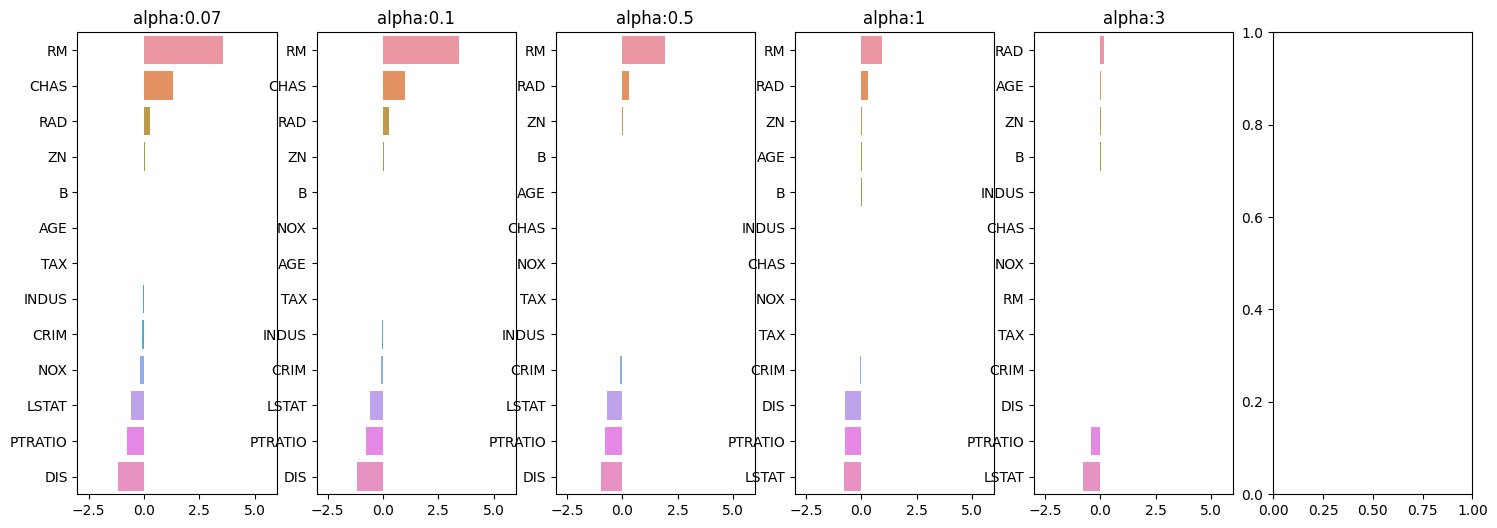

In [148]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=6)

for pos, alpha in enumerate(elastic_alphas):
    colname = 'alpha:' + str(alpha)
    coeff = coeff_elastic_df[colname]
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()